In [8]:
import pyarrow.parquet as pq
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
print('Doing startup junk')
df: pd.DataFrame = pq.read_table('fuller_data.parquet').to_pandas()
df.sort_values(by='anum', inplace=True)
df = df[df['anum'] > 0]
ndf = df.to_numpy()
df.reset_index(inplace=True)
df.head()

Doing startup junk


,index,,birth date,country,port of entry,date of entry,name,naid,id,naturalization date,naturalization location,alias,father,mother,father's name,mother's name,sex,anum,birth_date
0,18206,18206,11/25/1896,Italy,"New York, New York",1913-04-01,Angela Laferla,5174315,A172298/085-09-4368/Box 78,NaT,,Angela Sampugnaro,,,,,,172298,1896-11-25
1,338319,338319,09/23/1902,,,NaT,Rose Gilroy,5174316,A364376/085-07-0846/Box 183,NaT,,Rose Romano,,,,,,364376,1902-09-23
2,548396,548396,08/16/1900,,,NaT,Ronald Carter,5174317,A365047/085-07-0846/Box 25,NaT,,,,,,,,365047,1900-08-16
3,78169,78169,12/18/1896,Germany,WASHINGTON DC,1954-07-07,Oscar Dietz,40039441,A366961/566-016-0023/951,NaT,,,Unknown,Unknown,,,,366961,1896-12-18
4,440738,440738,06/09/1906,,,NaT,Kosti Lentonen,5174318,A367233/085-07-0633/Box 79,NaT,,,,,,,,367233,1906-06-09


In [38]:
anums = df['anum']
x = np.arange(len(anums))
y = anums.to_numpy()

x, y

(array([      0,       1,       2, ..., 1185929, 1185930, 1185931]),
 array([   172298,    364376,    365047, ..., 212387357, 300312559,
        300317508]))

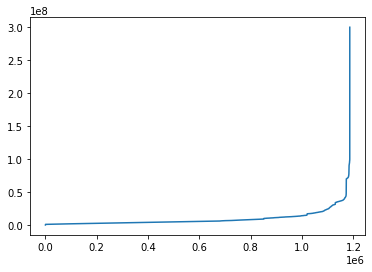

In [39]:
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

In [4]:
# Creating Graph
G = nx.DiGraph()

_last_anum = 0
for index, row in enumerate(ndf):
    country, poe, anum = row[2], row[3], row[16]
    if not isinstance(anum, int) or anum < 0:
        continue
    G.add_edge(_last_anum, anum, weight=0.1)
    if poe != '':
        G.add_edge(anum, poe, weight=1)
    _last_anum = anum
    
    if index == 10:
        break

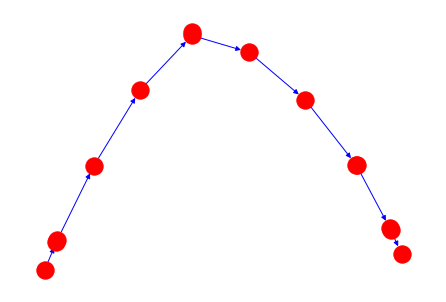

In [5]:
nx.draw_spectral(G, node_color='r', edge_color='b')

In [6]:
from networkx.algorithms import community

communities_generator = community.girvan_newman(G)
print(list(filter(lambda x: len(x) >= 5, next(communities_generator))))

[{0, 172298, 366961, 365047, 364376, 'New York, New York', 'WASHINGTON DC'}, {367264, 367233, 564226, 900195, 898379, 'Unknown', 'NEW YORK, NY (IA)'}]
